# Multiple Linear Regression

In [32]:
#importing machine learning libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
df=pd.read_csv("FuelConsumptionCo2.csv") #loading data into pandas dataframe
df.head() #first five rows
df.tail() #last five rows
df['MODEL'] #specific column
df[['MODEL','ENGINESIZE']] #multiple columns
df[34:39] #slicing specific rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
34,2014,AUDI,A8L,FULL-SIZE,4.0,8,AS8,Z,14.7,9.7,12.5,23,288
35,2014,AUDI,A8L,FULL-SIZE,6.3,12,AS8,Z,18.2,12.6,15.7,18,361
36,2014,AUDI,A8L TDI CLEAN DIESEL,FULL-SIZE,3.0,6,AS8,D,10.1,6.5,8.5,33,230
37,2014,AUDI,ALLROAD QUATTRO,STATION WAGON - SMALL,2.0,4,AS8,Z,11.8,8.8,10.5,27,242
38,2014,AUDI,Q5,SUV - SMALL,2.0,4,AS8,Z,12.0,8.5,10.4,27,239


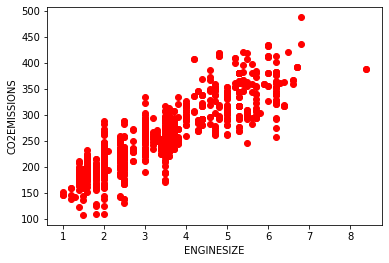

In [17]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# training and testing datasets

In [19]:
mask=np.random.rand(len(df))<0.8
train=df[mask] #train dataset 
test=df[~mask] #test dataset exclusive then train dataset

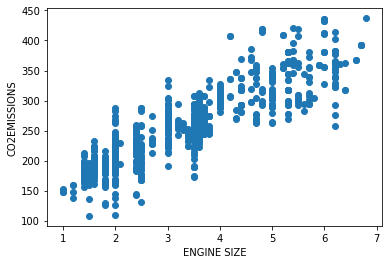

In [25]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [33]:
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y) # coefficent for best fit line
print(regr.coef_) #regression coefficient
print(regr.intercept_) #intercept coefficient

[[10.59837654  7.05792915 10.03563928]]
[64.34851096]


In [42]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) #predicting test dataset 
print(y_hat[1:10])
print(test.CO2EMISSIONS[1:10]) #comparing first ten predicted and actual value

[[325.17315878]
 [250.89037539]
 [276.60817417]
 [250.89037539]
 [206.104862  ]
 [252.89750325]
 [285.64024951]
 [292.66519701]
 [234.83335255]]
15    354
28    258
31    260
33    258
40    212
57    262
60    281
62    297
86    221
Name: CO2EMISSIONS, dtype: int64


In [41]:
regr.predict([[7.0,15,18.5]]) #predicting unknown value

array([[430.06541064]])

In [49]:
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print(np.mean((y_hat-y)**2)) #residual sum of square
print(regr.score(x,y)) #variance score

601.6117271350965
0.8576508831071826
